# Quartiers politique de la ville

In [1]:
from dgfip.read import get_qpv, get_dep
from dgfip.distance import add_distances
import pandas as pd
qpv = get_qpv()
qpv = add_distances(qpv)
dep = get_dep()

In [2]:
qpv.head(3)

,CODE_QP,NOM_QP,COMMUNE_QP,geometry,distance Buralistes,intersect Buralistes,distance Centre de Finances publiques,intersect Centre de Finances publiques,distance France Services,intersect France Services,distance Permanences finances publiques,intersect Permanences finances publiques,distance non Buralistes,intersect non Buralistes
0,QP044012,Le Ranzay,Nantes,"POLYGON ((357455.157 6692832.812, 357455.351 6...",0.324553,False,2.717901,False,4.500712,False,25.056348,False,2.717901,False
1,QP033010,Grand-Parc,Bordeaux,"POLYGON ((416890.442 6423848.428, 416894.521 6...",0.000000,True,1.824637,False,3.251293,False,79.473430,False,1.824637,False
2,QP066007,Bas-Vernet Nouveau QPV,Perpignan,"POLYGON ((691840.400 6178736.600, 691835.200 6...",0.005110,False,0.307418,False,1.026330,False,74.420676,False,0.307418,False


Text(0.5, 1.0, 'Distance des quartiers politique de la ville \n à la structure DGFiP (hors buralistes) la plus proche')

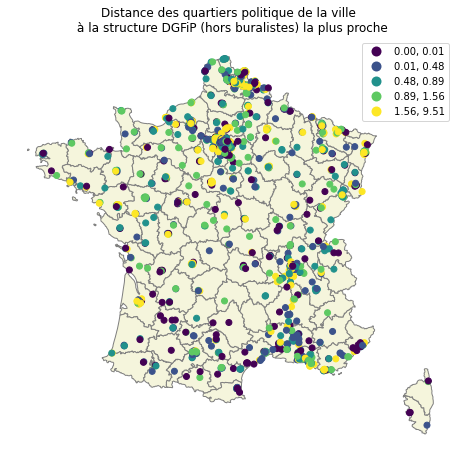

In [3]:
qpv_points = qpv.set_geometry(qpv.centroid)
ax = dep.to_crs('2154').plot(facecolor='beige', edgecolor='grey', figsize=(8,8))
qpv_points.plot(column = 'distance non Buralistes', scheme='Quantiles', legend=True, ax=ax)
ax.set_axis_off()
ax.set_title('Distance des quartiers politique de la ville \n à la structure DGFiP (hors buralistes) la plus proche')

In [4]:
l# to long format
long_qpv = pd.melt(qpv, value_vars=[col for col in qpv.columns if col.startswith('distance')], id_vars = 'CODE_QP', var_name='type', value_name='distance')
data =qpv[['CODE_QP','geometry', 'NOM_QP', 'COMMUNE_QP']].merge(long_qpv)
data = data.set_geometry(data.centroid).to_crs('4326')
data['service'] = data['type'].str.replace('distance ','')
data = data.drop(columns='type')

NameError: name 'l' is not defined

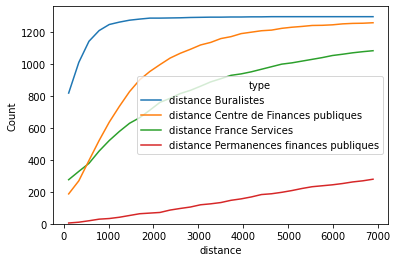

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.histplot(long_qpv[long_qpv['distance'].le(7000)], x='distance', hue='type', cumulative=True, stat='count', fill=False, element="poly", common_norm=False)